In [1]:
#Author:Han Han
#03/02/2019

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
#Adult Dataset

In [3]:
from sklearn.preprocessing import StandardScaler
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header = None)
data.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital-gain','capital-loss','hours_per_week','native_country','income']
data = data.replace(' ?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('column has = ', (data.columns))

Number of instances = 32561
Number of attributes = 15
column has =  Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [5]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

Number of duplicate rows = 24
Number of rows before discarding duplicates = 32561
Number of rows after discarding duplicates = 32537


In [6]:
data.isna().sum()
data.dropna(inplace =True)

In [7]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
data.describe(include = 'all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours_per_week,native_country,income
count,30139.000000,30139,3.013900e+04,30139,30139.000000,30139,30139,30139,30139,30139,30139.000000,30139.000000,30139.000000,30139,30139
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22264,NaN,9834,NaN,14059,4034,12457,25912,20366,NaN,NaN,NaN,27487,22633
mean,38.441720,NaN,1.897950e+05,NaN,10.122532,NaN,NaN,NaN,NaN,NaN,1092.841202,88.439928,40.934703,NaN,NaN
std,13.131426,NaN,1.056586e+05,NaN,2.548738,NaN,NaN,NaN,NaN,NaN,7409.110596,404.445239,11.978753,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.176275e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.784170e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.376045e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
import re

In [10]:
 def occup(x):
    if re.search('managerial', x):
        return 1
    #high skills
    elif re.search('specialty',x):
        return 1
    else:
    #low skills
        return 0

In [11]:
#private 0, government 1
data['workclass_num']=data['workclass'].apply(lambda x: 0 if re.search('Private',x) or re.search('Self-emp-not-inc',x) or re.search('Self-emp-inc',x) or re.search('Without-pay',x) or re.search('Never-worked',x) else 1)
data['class'] = np.where(data.income == ' <=50K', 0, 1)
data['marital_num']=data['marital_status'].apply(lambda x: 0 if re.search('Married',x) else 1)
data['race_num'] = data.race.map({' White':0, ' Black':1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3, ' Other':4})
data['sex_num'] = np.where(data.sex == ' Female', 0, 1)
data['occupation_num']=data.occupation.apply(lambda x: x.strip()).apply(lambda x: occup(x))


In [12]:
import matplotlib.pylab as pl
def stats(confusionMatrix): 
    TP=confusionMatrix[0,0]
    FN=confusionMatrix[0,1]
    FP=confusionMatrix[1,0]
    TN=confusionMatrix[1,1]
    acc = (TP+TN)/(TP+FN+FP+TN)
    TPR=TP/(TP+FN)
    FPR=FP/(FP+TN)
    Precision = TP/(TP+FP)
    Fmeasure=2*TP/(2*TP+FN+FP)
    print('Accuracy',acc)
    print('TPR',TPR)
    print('FPR',FPR)
    print('Precision',Precision)
    print('F-measure',Fmeasure)
    pl.figure()
    tb = pl.table(cellText=confusionMatrix, loc=(0,0), cellLoc='center')
    pl.xlabel('Predicted Class')
    pl.ylabel('Actural Class')
    #pl.title('Confusion Matrix')
    tc = tb.properties()['child_artists']
    for cell in tc: 
        cell.set_height(1/2)
        cell.set_width(1/2)
    ax = pl.gca()
    ax.set_xticks([])
    ax.set_yticks([])

In [13]:
#-------------------------------------------------------------------------------------------------------------------------------
#SVM

In [14]:
x = data[['age','fnlwgt','occupation_num','workclass_num', 'education_num', 'marital_num', 'race_num', 'sex_num', 'capital-gain', 'capital-loss','hours_per_week']]
y = data['class']
from sklearn.model_selection import train_test_split
SVMX_train,SVMX_test,SVMY_train,SVMY_test=train_test_split(x,y,test_size=0.3)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(SVMX_train)
SVMX_train=scaler.transform(SVMX_train)
scaler.fit(SVMX_test)
SVMX_test=scaler.transform(SVMX_test)
SVMX_train,SVMX_Vaildation,SVMY_train,SVMY_Vaildation = train_test_split(SVMX_train,SVMY_train,test_size=0.3)


C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  
C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [15]:
from sklearn import svm
sv = svm.SVC(gamma='scale',probability=True)
s=sv.fit(SVMX_train, SVMY_train)  


In [16]:
SVMY_pred= sv.predict(SVMX_Vaildation)

In [17]:
sv.score(SVMX_Vaildation, SVMY_Vaildation)

0.8483412322274881

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
confusionMatrix = confusion_matrix(SVMY_Vaildation,SVMY_pred)
print(confusionMatrix)
print(classification_report(SVMY_Vaildation,SVMY_pred))

[[4542  259]
 [ 701  828]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      4801
           1       0.76      0.54      0.63      1529

   micro avg       0.85      0.85      0.85      6330
   macro avg       0.81      0.74      0.77      6330
weighted avg       0.84      0.85      0.84      6330



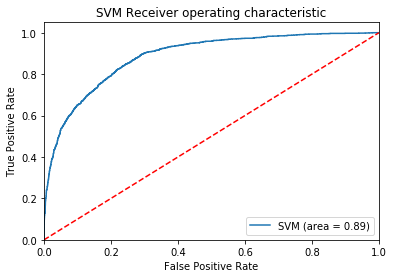

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svm_roc_auc = roc_auc_score(SVMY_Vaildation, sv.predict_proba(SVMX_Vaildation)[:,1])
fpr, tpr, thresholds = roc_curve(SVMY_Vaildation, sv.predict_proba(SVMX_Vaildation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

Accuracy 0.8483412322274881
TPR 0.9460529056446574
FPR 0.45846958796599085
Precision 0.8662979210375739
F-measure 0.9044205495818399
Area under ROC 0.8858610636627506


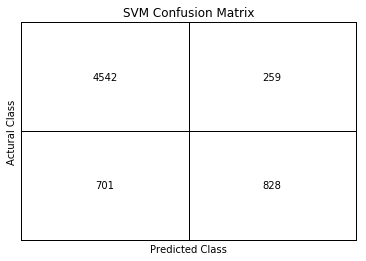

In [20]:
stats(confusionMatrix)
pl.title('SVM Confusion Matrix')

print('Area under ROC',svm_roc_auc)

Number of mislabeled points out of a total 9042 points : 1439
Decision Tree 0.8408537934085379
[[6401  391]
 [1048 1202]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6792
           1       0.75      0.53      0.63      2250

   micro avg       0.84      0.84      0.84      9042
   macro avg       0.81      0.74      0.76      9042
weighted avg       0.83      0.84      0.83      9042



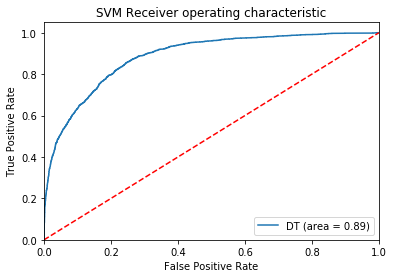

Accuracy 0.8408537934085379
TPR 0.942432273262662
FPR 0.4657777777777778
Precision 0.8593099744932206
F-measure 0.89895372515975
Area under ROC 0.8850006216463815


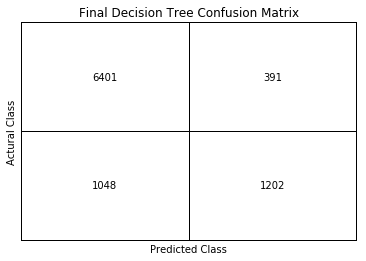

In [22]:
#Best Model
SVMY_pred=sv.predict(SVMX_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (SVMY_test.shape[0],(SVMY_test != SVMY_pred).sum()))

print('Decision Tree %s' % sv.score(SVMX_test, SVMY_test))
from sklearn.metrics import classification_report, confusion_matrix
confusionMatrixSVM=confusion_matrix(SVMY_test,SVMY_pred)
print(confusionMatrixSVM)
print(classification_report(SVMY_test,SVMY_pred))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
SVM_roc_auc2 = roc_auc_score(SVMY_test, sv.predict_proba(SVMX_test)[:,1])
fpr, tpr, thresholds = roc_curve(SVMY_test, sv.predict_proba(SVMX_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DT (area = %0.2f)' % SVM_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()
stats(confusionMatrixSVM)
pl.title('Final Decision Tree Confusion Matrix')
print('Area under ROC',SVM_roc_auc2)

In [23]:
#----------------------------------------------------------------------------------------------------------------------------
#Logisitic Regression

In [24]:
x = data[['age','fnlwgt','occupation_num','workclass_num', 'education_num', 'marital_num', 'race_num', 'sex_num', 'capital-gain', 'capital-loss','hours_per_week']]
y = data['class']
from sklearn.model_selection import train_test_split
LGX_train,LGX_test,LGY_train,LGY_test=train_test_split(x,y,test_size=0.3)
LGX_train,LGX_Vaildation,LGY_train,LGY_Vaildation = train_test_split(LGX_train,LGY_train,test_size=0.3)

In [25]:
import statsmodels.api as sm
logit_model=sm.Logit(LGY_train,LGX_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.382115
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.321     
Dependent Variable: class            AIC:              11307.3762
Date:               2019-03-04 21:26 BIC:              11390.9778
No. Observations:   14767            Log-Likelihood:   -5642.7   
Df Model:           10               LL-Null:          -8314.1   
Df Residuals:       14756            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age              -0.0116   0.0017  -6.8310 0.0000 -0.0149 -0.0083
fnlwgt           -0.0000   0.0000  -7.0245 0.0000 -0.0000 -0.0000


In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
l=logreg.fit(LGX_train, LGY_train)
LGY_pred = logreg.predict(LGX_Vaildation)
print('LogReg %s' % logreg.score(LGX_Vaildation, LGY_Vaildation))
#print('LogReg %s' % metrics.accuracy_score(LGY_Vaildation, LGY_pred))

LogReg 0.7894154818325434


C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
confusionMatrixLG = confusion_matrix(LGY_Vaildation,LGY_pred)
print(confusionMatrixLG)
print(classification_report(LGY_Vaildation,LGY_pred))

[[4594  194]
 [1139  403]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4788
           1       0.68      0.26      0.38      1542

   micro avg       0.79      0.79      0.79      6330
   macro avg       0.74      0.61      0.63      6330
weighted avg       0.77      0.79      0.75      6330



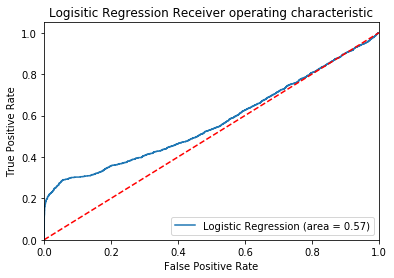

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(LGY_Vaildation, logreg.predict_proba(LGX_Vaildation)[:,1])
fpr, tpr, thresholds = roc_curve(LGY_Vaildation, logreg.predict_proba(LGX_Vaildation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logisitic Regression Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Accuracy 0.7894154818325434
TPR 0.9594820384294068
FPR 0.7386511024643321
Precision 0.8013256584685156
F-measure 0.8733010170135919
Area under ROC 0.5696753773755616


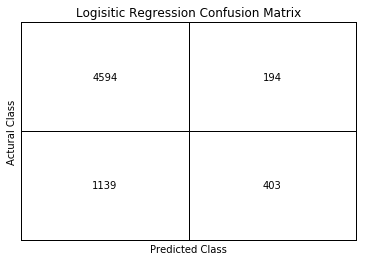

In [29]:
stats(confusionMatrixLG)
pl.title('Logisitic Regression Confusion Matrix')
print('Area under ROC',logit_roc_auc)

In [30]:
#-------------------------------------------------------------------------------------------------------------------------------
#Naive Bayes

In [31]:
x = data[['age','fnlwgt','occupation_num','workclass_num', 'education_num', 'marital_num', 'race_num', 'sex_num', 'capital-gain', 'capital-loss','hours_per_week']]
y = data['class']
from sklearn.model_selection import train_test_split
NBX_train, NBX_test, NBY_train, NBY_test = train_test_split(x, y,test_size=0.3)
NBX_train,NBX_Vaildation,NBY_train,NBY_Vaildation = train_test_split(NBX_train,NBY_train,test_size=0.3)


In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(NBX_train, NBY_train)
NBY_pred=gnb.predict(NBX_Vaildation)
print("Number of mislabeled points out of a total %d points : %d"
      % (NBY_Vaildation.shape[0],(NBY_Vaildation != NBY_pred).sum()))


Number of mislabeled points out of a total 6330 points : 1348


In [33]:
print('NB %s' % gnb.score(NBX_Vaildation, NBY_Vaildation))

NB 0.7870458135860979


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
confusionMatrix=confusion_matrix(NBY_Vaildation,NBY_pred)
print(confusionMatrix)
print(classification_report(NBY_Vaildation,NBY_pred))


[[4497  220]
 [1128  485]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4717
           1       0.69      0.30      0.42      1613

   micro avg       0.79      0.79      0.79      6330
   macro avg       0.74      0.63      0.64      6330
weighted avg       0.77      0.79      0.75      6330



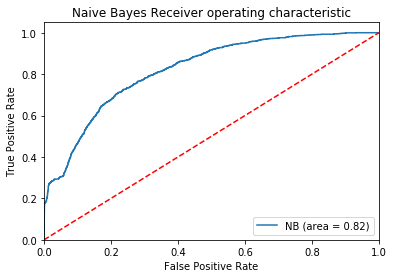

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
nb_roc_auc = roc_auc_score(NBY_Vaildation, gnb.predict_proba(NBX_Vaildation)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(NBY_Vaildation, gnb.predict_proba(NBX_Vaildation)[:,1])
plt.figure()
plt.plot(fpr3, tpr3, label='NB (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

Accuracy 0.7870458135860979
TPR 0.9533601865592538
FPR 0.6993180409175449
Precision 0.7994666666666667
F-measure 0.8696577064397601
Area under ROC 0.8219966140594209


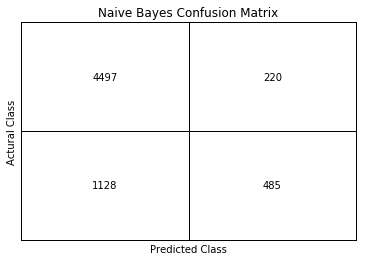

In [36]:
stats(confusionMatrix)
pl.title('Naive Bayes Confusion Matrix')
print('Area under ROC',nb_roc_auc)

In [39]:
#-------------------------------------------------------------------------------------------------------------------------------
#Decision Tree

In [40]:
x = data[['age','fnlwgt','occupation_num','workclass_num', 'education_num', 'marital_num', 'race_num', 'sex_num', 'capital-gain', 'capital-loss','hours_per_week']]
y = data['class']
from sklearn.model_selection import train_test_split
DTX_train, DTX_test, DTY_train, DTY_test = train_test_split(x, y,test_size=0.3)
DTX_train,DTX_Vaildation,DTY_train,DTY_Vaildation = train_test_split(DTX_train,DTY_train,test_size=0.3)

In [41]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT = DT.fit(DTX_train, DTY_train)

In [42]:
DTY_pred=DT.predict(DTX_Vaildation)
print("Number of mislabeled points out of a total %d points : %d"
      % (DTY_Vaildation.shape[0],(DTY_Vaildation != DTY_pred).sum()))

Number of mislabeled points out of a total 6330 points : 1240


In [43]:
print('Decision Tree %s' % DT.score(DTX_Vaildation, DTY_Vaildation))

Decision Tree 0.8041074249605056


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
confusionMatrix=confusion_matrix(DTY_Vaildation,DTY_pred)
print(confusionMatrix)
print(classification_report(DTY_Vaildation,DTY_pred))

[[4121  674]
 [ 566  969]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4795
           1       0.59      0.63      0.61      1535

   micro avg       0.80      0.80      0.80      6330
   macro avg       0.73      0.75      0.74      6330
weighted avg       0.81      0.80      0.81      6330



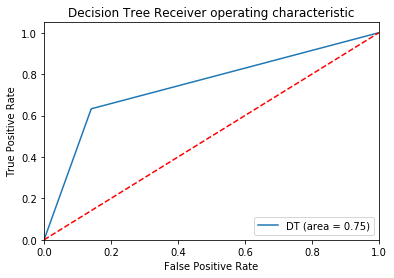

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(DTY_Vaildation, DT.predict_proba(DTX_Vaildation)[:,1])
fpr, tpr, thresholds = roc_curve(DTY_Vaildation, DT.predict_proba(DTX_Vaildation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DT (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Accuracy 0.8041074249605056
TPR 0.859436913451512
FPR 0.36872964169381106
Precision 0.8792404523149135
F-measure 0.8692259017085003
Area under ROC 0.7458750802444186


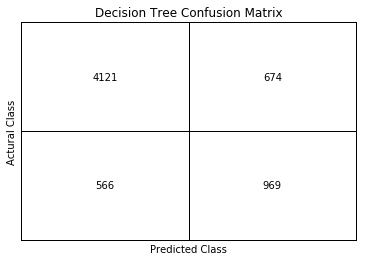

In [46]:
stats(confusionMatrix)
pl.title('Decision Tree Confusion Matrix')
print('Area under ROC',dt_roc_auc)

In [47]:
#-------------------------------------------------------------------------------------------------------------------------------
#Wine Dataset

In [48]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [49]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=';')
data.columns = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']
data = data.replace(' ?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('column has = ', (data.columns))
df=data
df['class']=data['quality'].apply(lambda x: 0 if int(x)<=5 else 1)
df = df.drop(columns='quality')

Number of instances = 1599
Number of attributes = 12
column has =  Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [50]:
df.iloc[:,11]
x = df.iloc[:,:-1]
y=df.iloc[:,11]

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
trainDF=pd.DataFrame()
trainDF=x_train
trainDF['class']=y_train

C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [52]:
#-------------------------------------------------------------------------------------------------------------------------------
#KNN


knn acc 0.6964285714285714
[[61 20]
 [14 17]]
Accuracy 0.6964285714285714
TPR 0.7530864197530864
FPR 0.45161290322580644
Precision 0.8133333333333334
F-measure 0.782051282051282
Area under ROC 0.7419354838709677
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        81
           1       0.46      0.55      0.50        31

   micro avg       0.70      0.70      0.70       112
   macro avg       0.64      0.65      0.64       112
weighted avg       0.72      0.70      0.70       112



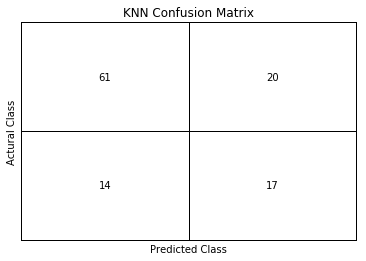

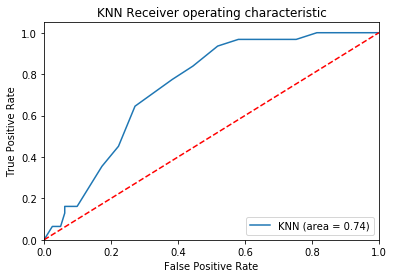


knn acc 0.7946428571428571
[[68  7]
 [16 21]]
Accuracy 0.7946428571428571
TPR 0.9066666666666666
FPR 0.43243243243243246
Precision 0.8095238095238095
F-measure 0.8553459119496856
Area under ROC 0.8180180180180181
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        75
           1       0.75      0.57      0.65        37

   micro avg       0.79      0.79      0.79       112
   macro avg       0.78      0.74      0.75       112
weighted avg       0.79      0.79      0.79       112



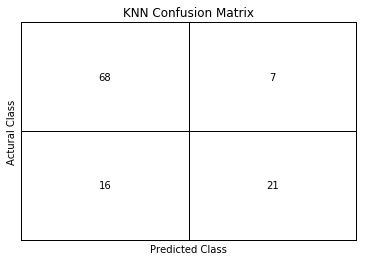

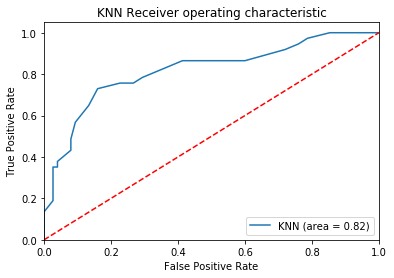


knn acc 0.5982142857142857
[[30 14]
 [31 37]]
Accuracy 0.5982142857142857
TPR 0.6818181818181818
FPR 0.45588235294117646
Precision 0.4918032786885246
F-measure 0.5714285714285714
Area under ROC 0.6925133689839572
              precision    recall  f1-score   support

           0       0.49      0.68      0.57        44
           1       0.73      0.54      0.62        68

   micro avg       0.60      0.60      0.60       112
   macro avg       0.61      0.61      0.60       112
weighted avg       0.63      0.60      0.60       112



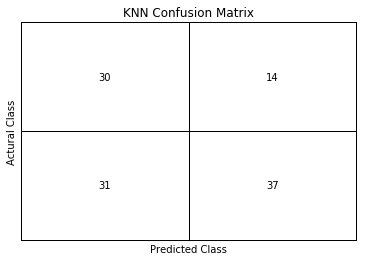

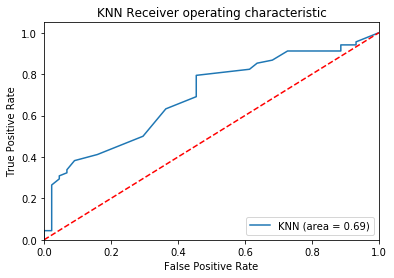


knn acc 0.7946428571428571
[[24 12]
 [11 65]]
Accuracy 0.7946428571428571
TPR 0.6666666666666666
FPR 0.14473684210526316
Precision 0.6857142857142857
F-measure 0.676056338028169
Area under ROC 0.8475877192982456
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        36
           1       0.84      0.86      0.85        76

   micro avg       0.79      0.79      0.79       112
   macro avg       0.76      0.76      0.76       112
weighted avg       0.79      0.79      0.79       112



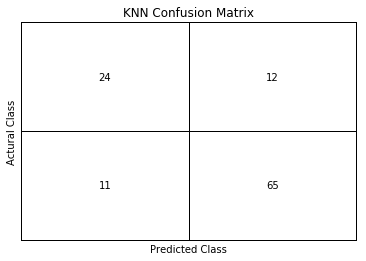

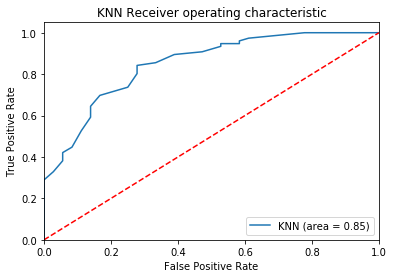


knn acc 0.6517857142857143
[[19 23]
 [16 54]]
Accuracy 0.6517857142857143
TPR 0.4523809523809524
FPR 0.22857142857142856
Precision 0.5428571428571428
F-measure 0.4935064935064935
Area under ROC 0.7210884353741496
              precision    recall  f1-score   support

           0       0.54      0.45      0.49        42
           1       0.70      0.77      0.73        70

   micro avg       0.65      0.65      0.65       112
   macro avg       0.62      0.61      0.61       112
weighted avg       0.64      0.65      0.64       112



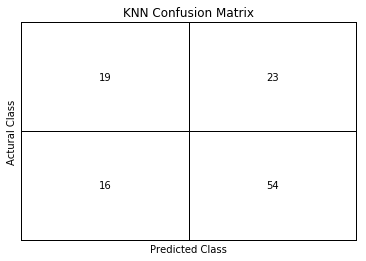

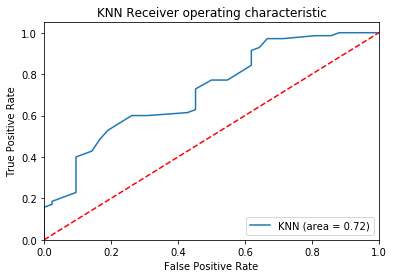


knn acc 0.7589285714285714
[[49 12]
 [15 36]]
Accuracy 0.7589285714285714
TPR 0.8032786885245902
FPR 0.29411764705882354
Precision 0.765625
F-measure 0.784
Area under ROC 0.7703310832529733
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        61
           1       0.75      0.71      0.73        51

   micro avg       0.76      0.76      0.76       112
   macro avg       0.76      0.75      0.76       112
weighted avg       0.76      0.76      0.76       112



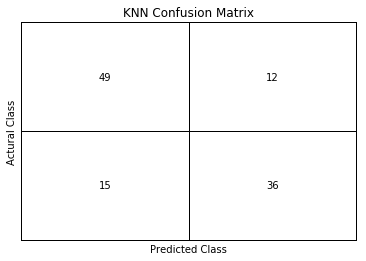

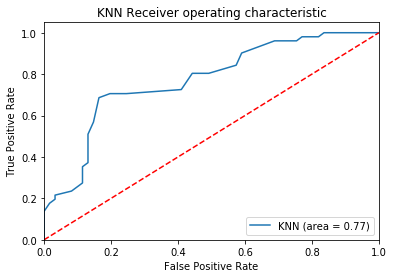


knn acc 0.7410714285714286
[[68 10]
 [19 15]]
Accuracy 0.7410714285714286
TPR 0.8717948717948718
FPR 0.5588235294117647
Precision 0.7816091954022989
F-measure 0.8242424242424242
Area under ROC 0.7799773755656109
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        78
           1       0.60      0.44      0.51        34

   micro avg       0.74      0.74      0.74       112
   macro avg       0.69      0.66      0.67       112
weighted avg       0.73      0.74      0.73       112



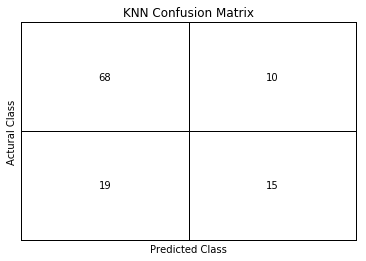

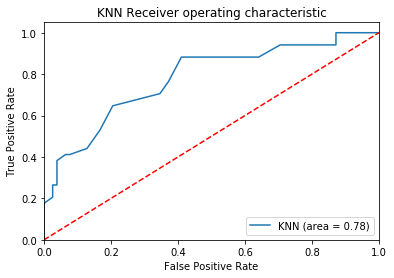


knn acc 0.75
[[38 16]
 [12 46]]
Accuracy 0.75
TPR 0.7037037037037037
FPR 0.20689655172413793
Precision 0.76
F-measure 0.7307692307692307
Area under ROC 0.8290229885057472
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        54
           1       0.74      0.79      0.77        58

   micro avg       0.75      0.75      0.75       112
   macro avg       0.75      0.75      0.75       112
weighted avg       0.75      0.75      0.75       112



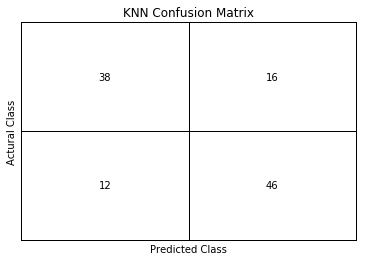

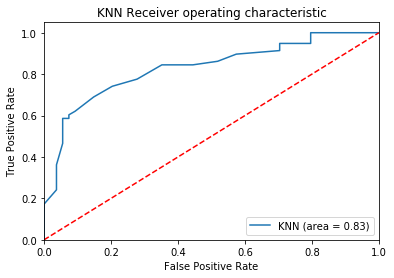


knn acc 0.7767857142857143
[[19 16]
 [ 9 68]]
Accuracy 0.7767857142857143
TPR 0.5428571428571428
FPR 0.11688311688311688
Precision 0.6785714285714286
F-measure 0.6031746031746031
Area under ROC 0.837291280148423
              precision    recall  f1-score   support

           0       0.68      0.54      0.60        35
           1       0.81      0.88      0.84        77

   micro avg       0.78      0.78      0.78       112
   macro avg       0.74      0.71      0.72       112
weighted avg       0.77      0.78      0.77       112



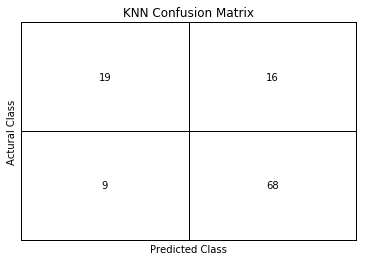

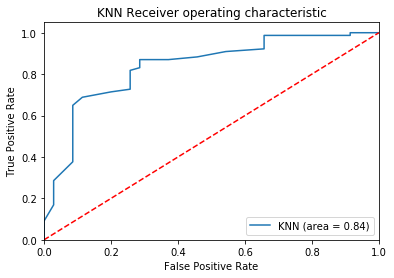


knn acc 0.7567567567567568
[[16  8]
 [19 68]]
Accuracy 0.7567567567567568
TPR 0.6666666666666666
FPR 0.21839080459770116
Precision 0.45714285714285713
F-measure 0.5423728813559322
Area under ROC 0.7703544061302683
              precision    recall  f1-score   support

           0       0.46      0.67      0.54        24
           1       0.89      0.78      0.83        87

   micro avg       0.76      0.76      0.76       111
   macro avg       0.68      0.72      0.69       111
weighted avg       0.80      0.76      0.77       111



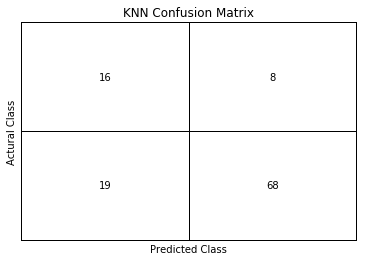

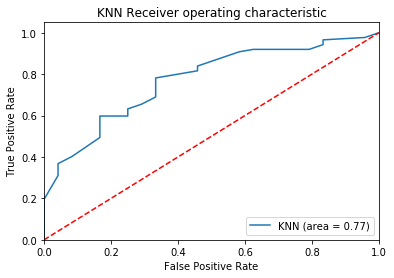


Averaged KNN Accuracy 0.7319256756756757
Avearged Area under ROC 0.7808120159148362


Accuracy 0.7363636363636363
TPR 0.75
FPR 0.27586206896551724
Precision 0.7090909090909091
F-measure 0.7289719626168224


Text(0.5, 1.0, 'Final KNN Confusion Matrix')

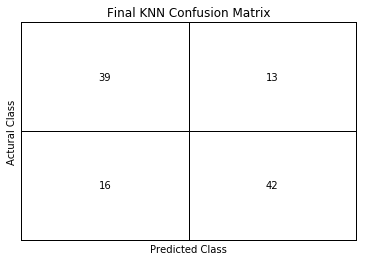

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
kf=KFold(n_splits=10)
score=0
sumTP=0
sumFN=0
sumFP=0
sumTN=0
Area=0
#print(trainDF)
for train,validation in kf.split(trainDF):
    trainSet=df.iloc[train]
    validationSet=df.iloc[validation]
    x_train=trainSet.iloc[:,:-1]
    y_train=trainSet.iloc[:,11]
    x_val=validationSet.iloc[:,:-1]
    y_val=validationSet.iloc[:,11]
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train=scaler.transform(x_train)
    #scaler.fit(x_val)
    x_val=scaler.transform(x_val)
    neighbor = int(np.sqrt(1600))
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    k=knn.fit(x_train,y_train)
    y_pred = knn.predict(x_val)
    score += knn.score(x_val, y_val)
    print('\nknn acc %s' % knn.score(x_val, y_val))
    confusionMatrix = confusion_matrix(y_val,y_pred)
    print(confusionMatrix)
    stats(confusionMatrix) 
    pl.title('KNN Confusion Matrix')
    knn_roc_auc = roc_auc_score(y_val, knn.predict_proba(x_val)[:,1])
    print('Area under ROC',knn_roc_auc)
    Area +=knn_roc_auc
    print(classification_report(y_val,y_pred))
    fpr, tpr, thresholds = roc_curve(y_val, knn.predict_proba(x_val)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('KNN Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('KNN_ROC')
    plt.show()
        
    sumTP+=confusionMatrix[0,0]
    sumFN+=confusionMatrix[0,1]
    sumFP+=confusionMatrix[1,0]
    sumTN+=confusionMatrix[1,1]
    
print('\nAveraged KNN Accuracy %s' % str(float(score)/10))
print('Avearged Area under ROC',Area/10)

print('\n')
sumConfusionMatrix=np.array([[sumTP/10,sumFN/10],[sumFP/10,sumTN/10]],np.int32)
stats(sumConfusionMatrix)
pl.title('Final KNN Confusion Matrix')


Optimization terminated successfully.
         Current function value: 0.507532
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.262     
Dependent Variable:   class             AIC:               1044.1700 
Date:                 2019-03-04 21:27  BIC:               1098.2320 
No. Observations:     1007              Log-Likelihood:    -511.08   
Df Model:             10                LL-Null:           -692.09   
Df Residuals:         996               LLR p-value:       1.1256e-71
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed_acidity         0.0572   0.0800  0.7143 0.4751  -0.0997  0.2140
volatile_acidity

C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


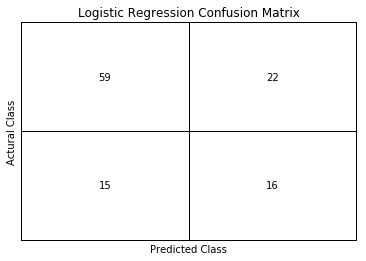

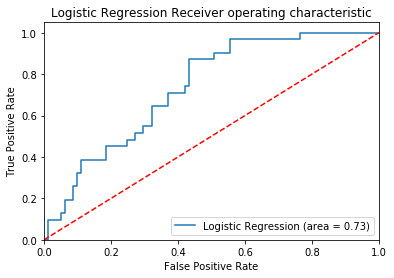

Optimization terminated successfully.
         Current function value: 0.514628
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.253     
Dependent Variable:   class             AIC:               1058.4608 
Date:                 2019-03-04 21:27  BIC:               1112.5228 
No. Observations:     1007              Log-Likelihood:    -518.23   
Df Model:             10                LL-Null:           -693.32   
Df Residuals:         996               LLR p-value:       3.6499e-69
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed_acidity         0.0959   0.0798  1.2017 0.2295  -0.0605  0.2524
volatile_acidity

C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


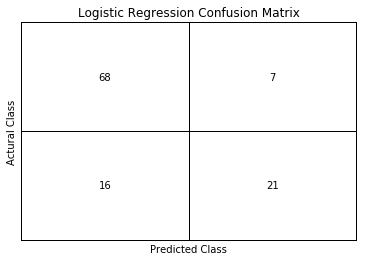

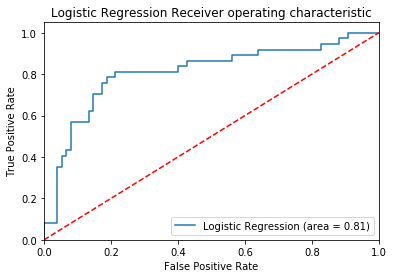

Optimization terminated successfully.
         Current function value: 0.497494
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.282     
Dependent Variable:   class             AIC:               1023.9524 
Date:                 2019-03-04 21:27  BIC:               1078.0145 
No. Observations:     1007              Log-Likelihood:    -500.98   
Df Model:             10                LL-Null:           -697.39   
Df Residuals:         996               LLR p-value:       3.1592e-78
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed_acidity         0.1016   0.0852  1.1934 0.2327  -0.0653  0.2685
volatile_acidity

C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


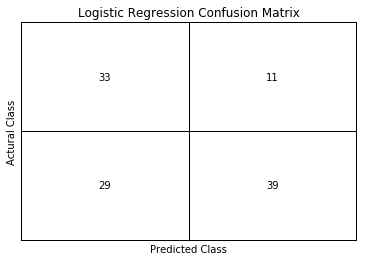

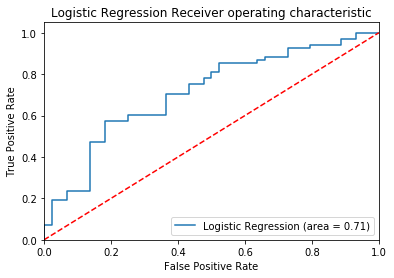

Optimization terminated successfully.
         Current function value: 0.517255
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.254     
Dependent Variable:   class             AIC:               1063.7509 
Date:                 2019-03-04 21:27  BIC:               1117.8129 
No. Observations:     1007              Log-Likelihood:    -520.88   
Df Model:             10                LL-Null:           -697.82   
Df Residuals:         996               LLR p-value:       5.9564e-70
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed_acidity         0.1027   0.0806  1.2753 0.2022  -0.0552  0.2606
volatile_acidity

C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


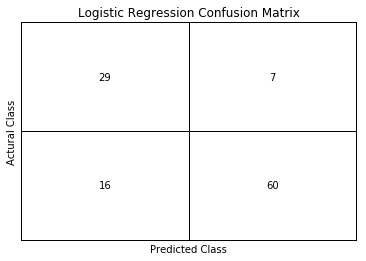

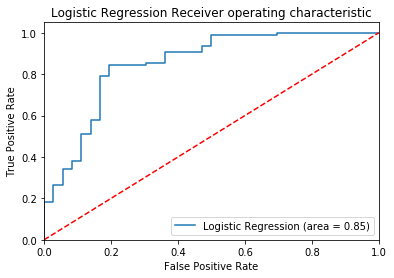

Optimization terminated successfully.
         Current function value: 0.506744
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.268     
Dependent Variable:   class             AIC:               1042.5824 
Date:                 2019-03-04 21:27  BIC:               1096.6445 
No. Observations:     1007              Log-Likelihood:    -510.29   
Df Model:             10                LL-Null:           -697.52   
Df Residuals:         996               LLR p-value:       2.5430e-74
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed_acidity         0.1848   0.0832  2.2214 0.0263   0.0218  0.3479
volatile_acidity

C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


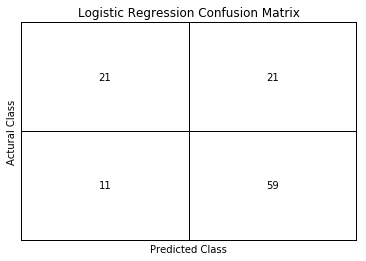

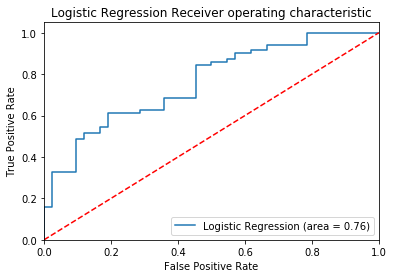

Optimization terminated successfully.
         Current function value: 0.501716
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.274     
Dependent Variable:   class             AIC:               1032.4559 
Date:                 2019-03-04 21:27  BIC:               1086.5179 
No. Observations:     1007              Log-Likelihood:    -505.23   
Df Model:             10                LL-Null:           -695.63   
Df Residuals:         996               LLR p-value:       1.1367e-75
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed_acidity         0.1894   0.0834  2.2720 0.0231   0.0260  0.3528
volatile_acidity

C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


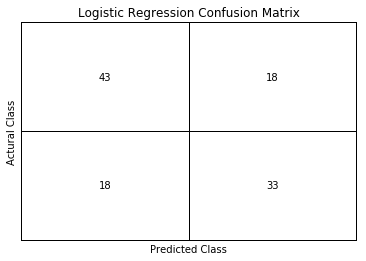

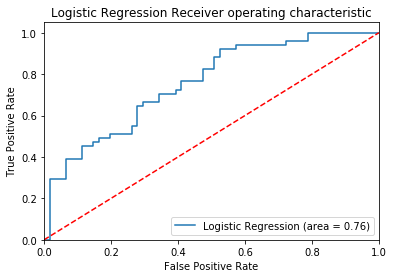

Optimization terminated successfully.
         Current function value: 0.505622
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.265     
Dependent Variable:   class             AIC:               1040.3222 
Date:                 2019-03-04 21:27  BIC:               1094.3843 
No. Observations:     1007              Log-Likelihood:    -509.16   
Df Model:             10                LL-Null:           -692.72   
Df Residuals:         996               LLR p-value:       9.2212e-73
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed_acidity         0.1029   0.0803  1.2809 0.2002  -0.0546  0.2604
volatile_acidity

C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


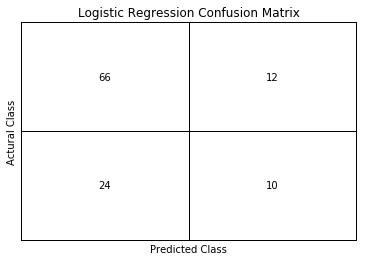

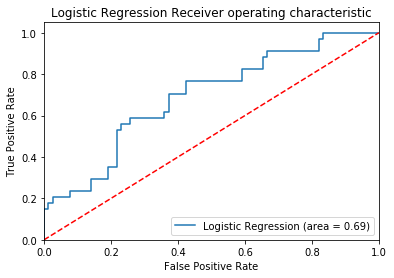

Optimization terminated successfully.
         Current function value: 0.511707
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.260     
Dependent Variable:   class             AIC:               1052.5773 
Date:                 2019-03-04 21:27  BIC:               1106.6393 
No. Observations:     1007              Log-Likelihood:    -515.29   
Df Model:             10                LL-Null:           -696.50   
Df Residuals:         996               LLR p-value:       9.2166e-72
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed_acidity         0.1486   0.0816  1.8216 0.0685  -0.0113  0.3085
volatile_acidity

C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


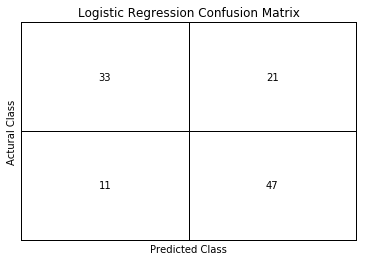

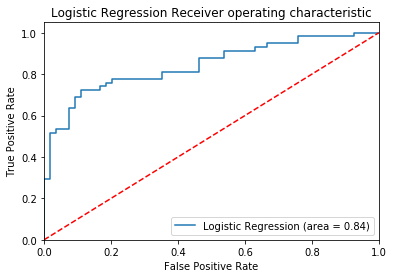

Optimization terminated successfully.
         Current function value: 0.523110
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.245     
Dependent Variable:   class             AIC:               1075.5442 
Date:                 2019-03-04 21:27  BIC:               1129.6062 
No. Observations:     1007              Log-Likelihood:    -526.77   
Df Model:             10                LL-Null:           -697.86   
Df Residuals:         996               LLR p-value:       1.8288e-67
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed_acidity         0.1640   0.0796  2.0609 0.0393   0.0080  0.3199
volatile_acidity

C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


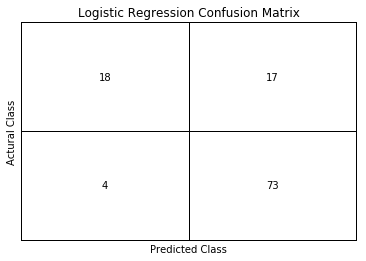

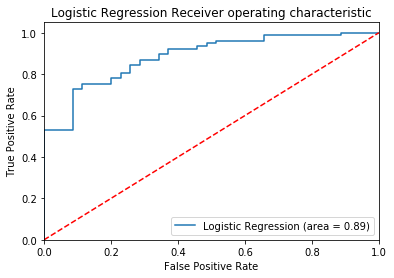

Optimization terminated successfully.
         Current function value: 0.516875
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.254     
Dependent Variable:   class             AIC:               1064.0204 
Date:                 2019-03-04 21:27  BIC:               1118.0933 
No. Observations:     1008              Log-Likelihood:    -521.01   
Df Model:             10                LL-Null:           -698.68   
Df Residuals:         997               LLR p-value:       2.9186e-70
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed_acidity         0.1360   0.0806  1.6863 0.0917  -0.0221  0.2940
volatile_acidity

C:\Users\mrj\Anaconda2\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


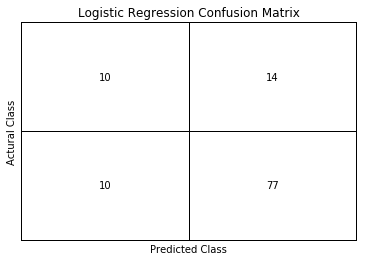

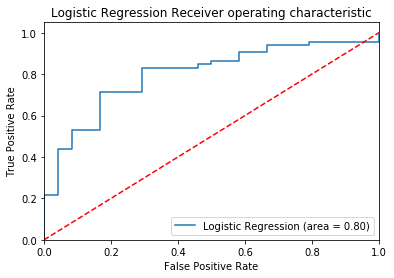


Averaged Logistic Regression Accuracy 0.7283783783783784
Avearged Area under ROC 0.7837982731229622


Accuracy 0.7297297297297297
TPR 0.7169811320754716
FPR 0.25862068965517243
Precision 0.7169811320754716
F-measure 0.7169811320754716


Text(0.5, 1.0, 'Final Logistic Regression Confusion Matrix')

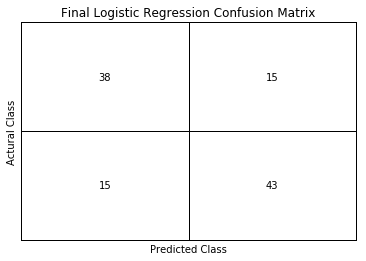

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
kf=KFold(n_splits=10)
score1=0
sumTP=0
sumFN=0
sumFP=0
sumTN=0
Area=0
#print(trainDF)
for train,validation in kf.split(trainDF):
    trainSet=df.iloc[train]
    validationSet=df.iloc[validation]
    x_trainL=trainSet.iloc[:,:-1]
    y_trainL=trainSet.iloc[:,11]
    x_valL=validationSet.iloc[:,:-1]
    y_valL=validationSet.iloc[:,11]
    logit_model=sm.Logit(y_trainL,x_trainL)
    result=logit_model.fit()
    print(result.summary2())

    logreg = LogisticRegression()
    logreg.fit(x_trainL, y_trainL)
    y_predL = logreg.predict(x_valL)
    print('LogReg %s' % logreg.score(x_valL, y_valL))

    from sklearn.metrics import classification_report, confusion_matrix
    confusionMatrixLG = confusion_matrix(y_valL,y_predL)
    print(confusionMatrixLG)
    print(classification_report(y_valL,y_predL))

    score1 += logreg.score(x_valL, y_valL)
    confusionMatrixLG = confusion_matrix(y_valL,y_predL)
    print(confusionMatrixLG)
    stats(confusionMatrixLG) 
    pl.title('Logistic Regression Confusion Matrix')
    logist_roc_auc = roc_auc_score(y_valL, logreg.predict_proba(x_valL)[:,1])
    print('Area under ROC',logist_roc_auc)
    Area +=logist_roc_auc
    print(classification_report(y_valL,y_predL))
    fpr, tpr, thresholds = roc_curve(y_valL, logreg.predict_proba(x_valL)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logist_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('logist_ROC')
    plt.show()
        
    sumTP+=confusionMatrixLG[0,0]
    sumFN+=confusionMatrixLG[0,1]
    sumFP+=confusionMatrixLG[1,0]
    sumTN+=confusionMatrixLG[1,1]
    
print('\nAveraged Logistic Regression Accuracy %s' % str(float(score1)/10))
print('Avearged Area under ROC',Area/10)

print('\n')
sumConfusionMatrix=np.array([[sumTP/10,sumFN/10],[sumFP/10,sumTN/10]],np.int32)
stats(sumConfusionMatrix)
pl.title('Final Logistic Regression Confusion Matrix')


[[74  7]
 [23  8]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        81
           1       0.53      0.26      0.35        31

   micro avg       0.73      0.73      0.73       112
   macro avg       0.65      0.59      0.59       112
weighted avg       0.70      0.73      0.70       112

[[74  7]
 [23  8]]
Accuracy 0.7321428571428571
TPR 0.9135802469135802
FPR 0.7419354838709677
Precision 0.7628865979381443
F-measure 0.8314606741573034
Area under ROC 0.7724014336917563
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        81
           1       0.53      0.26      0.35        31

   micro avg       0.73      0.73      0.73       112
   macro avg       0.65      0.59      0.59       112
weighted avg       0.70      0.73      0.70       112



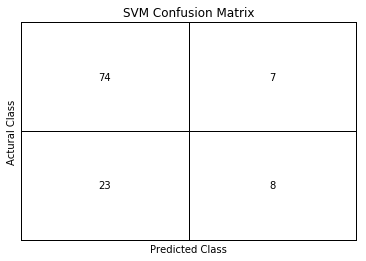

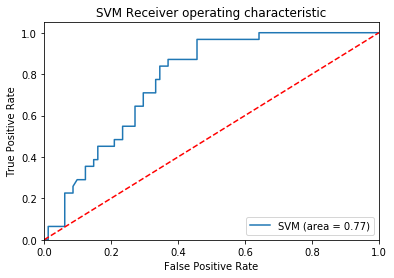

[[68  7]
 [18 19]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84        75
           1       0.73      0.51      0.60        37

   micro avg       0.78      0.78      0.78       112
   macro avg       0.76      0.71      0.72       112
weighted avg       0.77      0.78      0.76       112

[[68  7]
 [18 19]]
Accuracy 0.7767857142857143
TPR 0.9066666666666666
FPR 0.4864864864864865
Precision 0.7906976744186046
F-measure 0.84472049689441
Area under ROC 0.7592792792792793
              precision    recall  f1-score   support

           0       0.79      0.91      0.84        75
           1       0.73      0.51      0.60        37

   micro avg       0.78      0.78      0.78       112
   macro avg       0.76      0.71      0.72       112
weighted avg       0.77      0.78      0.76       112



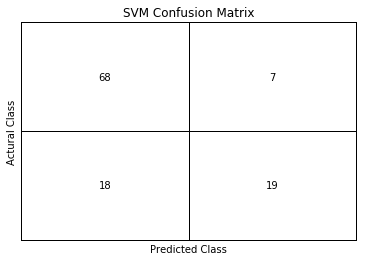

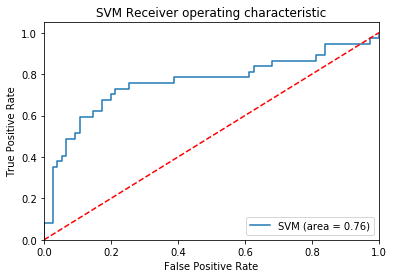

[[30 14]
 [22 46]]
              precision    recall  f1-score   support

           0       0.58      0.68      0.62        44
           1       0.77      0.68      0.72        68

   micro avg       0.68      0.68      0.68       112
   macro avg       0.67      0.68      0.67       112
weighted avg       0.69      0.68      0.68       112

[[30 14]
 [22 46]]
Accuracy 0.6785714285714286
TPR 0.6818181818181818
FPR 0.3235294117647059
Precision 0.5769230769230769
F-measure 0.625
Area under ROC 0.7463235294117647
              precision    recall  f1-score   support

           0       0.58      0.68      0.62        44
           1       0.77      0.68      0.72        68

   micro avg       0.68      0.68      0.68       112
   macro avg       0.67      0.68      0.67       112
weighted avg       0.69      0.68      0.68       112



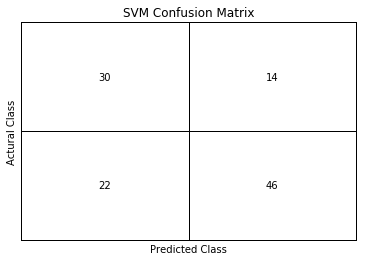

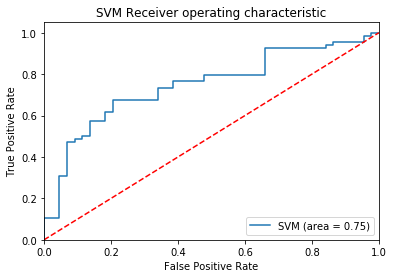

[[28  8]
 [11 65]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        36
           1       0.89      0.86      0.87        76

   micro avg       0.83      0.83      0.83       112
   macro avg       0.80      0.82      0.81       112
weighted avg       0.83      0.83      0.83       112

[[28  8]
 [11 65]]
Accuracy 0.8303571428571429
TPR 0.7777777777777778
FPR 0.14473684210526316
Precision 0.717948717948718
F-measure 0.7466666666666667
Area under ROC 0.8439327485380117
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        36
           1       0.89      0.86      0.87        76

   micro avg       0.83      0.83      0.83       112
   macro avg       0.80      0.82      0.81       112
weighted avg       0.83      0.83      0.83       112



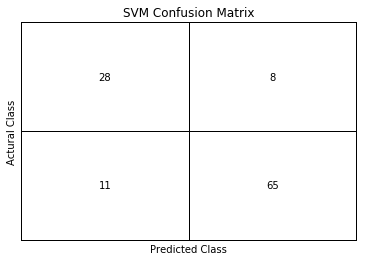

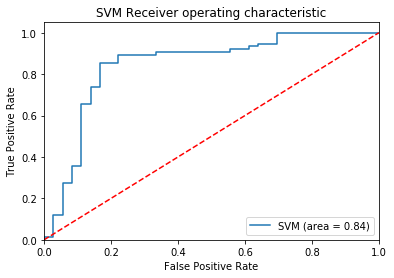

[[23 19]
 [12 58]]
              precision    recall  f1-score   support

           0       0.66      0.55      0.60        42
           1       0.75      0.83      0.79        70

   micro avg       0.72      0.72      0.72       112
   macro avg       0.71      0.69      0.69       112
weighted avg       0.72      0.72      0.72       112

[[23 19]
 [12 58]]
Accuracy 0.7232142857142857
TPR 0.5476190476190477
FPR 0.17142857142857143
Precision 0.6571428571428571
F-measure 0.5974025974025974
Area under ROC 0.7738095238095237
              precision    recall  f1-score   support

           0       0.66      0.55      0.60        42
           1       0.75      0.83      0.79        70

   micro avg       0.72      0.72      0.72       112
   macro avg       0.71      0.69      0.69       112
weighted avg       0.72      0.72      0.72       112



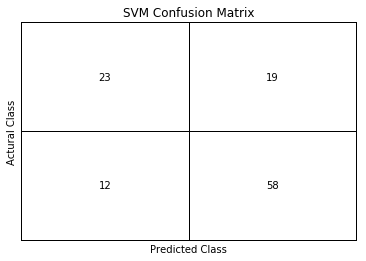

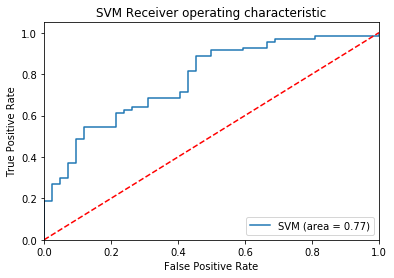

[[48 13]
 [16 35]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        61
           1       0.73      0.69      0.71        51

   micro avg       0.74      0.74      0.74       112
   macro avg       0.74      0.74      0.74       112
weighted avg       0.74      0.74      0.74       112

[[48 13]
 [16 35]]
Accuracy 0.7410714285714286
TPR 0.7868852459016393
FPR 0.3137254901960784
Precision 0.75
F-measure 0.768
Area under ROC 0.818868531018965
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        61
           1       0.73      0.69      0.71        51

   micro avg       0.74      0.74      0.74       112
   macro avg       0.74      0.74      0.74       112
weighted avg       0.74      0.74      0.74       112



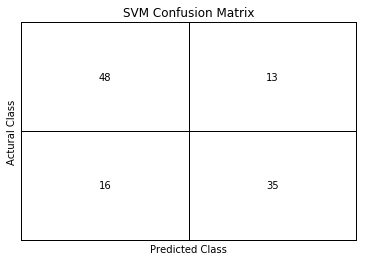

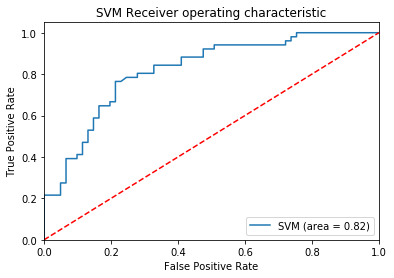

[[66 12]
 [17 17]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        78
           1       0.59      0.50      0.54        34

   micro avg       0.74      0.74      0.74       112
   macro avg       0.69      0.67      0.68       112
weighted avg       0.73      0.74      0.73       112

[[66 12]
 [17 17]]
Accuracy 0.7410714285714286
TPR 0.8461538461538461
FPR 0.5
Precision 0.7951807228915663
F-measure 0.8198757763975155
Area under ROC 0.7662141779788839
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        78
           1       0.59      0.50      0.54        34

   micro avg       0.74      0.74      0.74       112
   macro avg       0.69      0.67      0.68       112
weighted avg       0.73      0.74      0.73       112



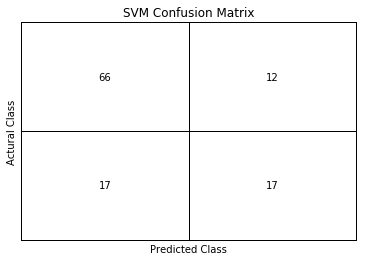

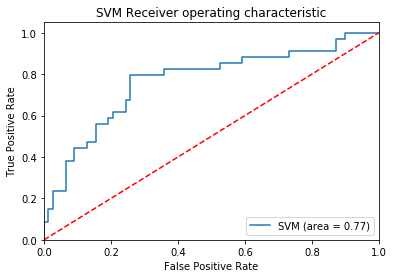

[[39 15]
 [14 44]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        54
           1       0.75      0.76      0.75        58

   micro avg       0.74      0.74      0.74       112
   macro avg       0.74      0.74      0.74       112
weighted avg       0.74      0.74      0.74       112

[[39 15]
 [14 44]]
Accuracy 0.7410714285714286
TPR 0.7222222222222222
FPR 0.2413793103448276
Precision 0.7358490566037735
F-measure 0.7289719626168224
Area under ROC 0.8524904214559387
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        54
           1       0.75      0.76      0.75        58

   micro avg       0.74      0.74      0.74       112
   macro avg       0.74      0.74      0.74       112
weighted avg       0.74      0.74      0.74       112



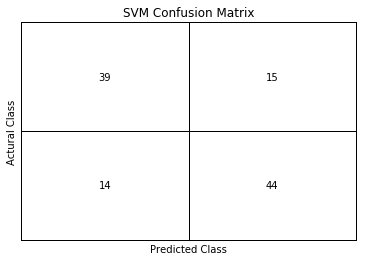

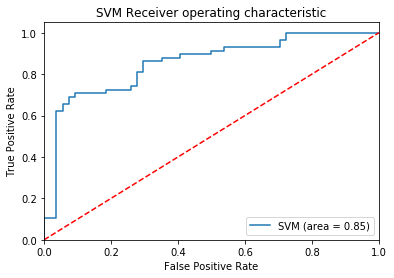

[[20 15]
 [ 5 72]]
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        35
           1       0.83      0.94      0.88        77

   micro avg       0.82      0.82      0.82       112
   macro avg       0.81      0.75      0.77       112
weighted avg       0.82      0.82      0.81       112

[[20 15]
 [ 5 72]]
Accuracy 0.8214285714285714
TPR 0.5714285714285714
FPR 0.06493506493506493
Precision 0.8
F-measure 0.6666666666666666
Area under ROC 0.8656771799628942
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        35
           1       0.83      0.94      0.88        77

   micro avg       0.82      0.82      0.82       112
   macro avg       0.81      0.75      0.77       112
weighted avg       0.82      0.82      0.81       112



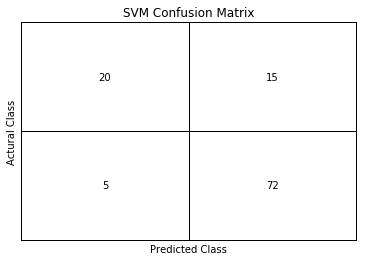

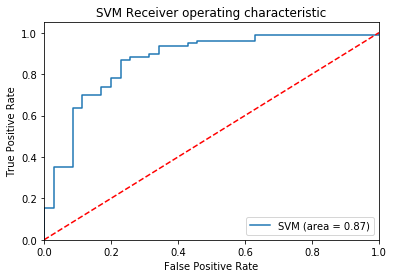

[[15  9]
 [18 69]]
              precision    recall  f1-score   support

           0       0.45      0.62      0.53        24
           1       0.88      0.79      0.84        87

   micro avg       0.76      0.76      0.76       111
   macro avg       0.67      0.71      0.68       111
weighted avg       0.79      0.76      0.77       111

[[15  9]
 [18 69]]
Accuracy 0.7567567567567568
TPR 0.625
FPR 0.20689655172413793
Precision 0.45454545454545453
F-measure 0.5263157894736842
Area under ROC 0.7648467432950191
              precision    recall  f1-score   support

           0       0.45      0.62      0.53        24
           1       0.88      0.79      0.84        87

   micro avg       0.76      0.76      0.76       111
   macro avg       0.67      0.71      0.68       111
weighted avg       0.79      0.76      0.77       111



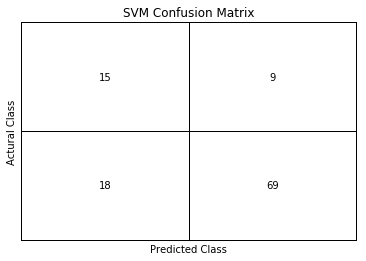

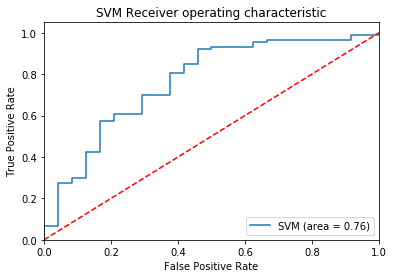


Averaged SVM Accuracy 0.7542471042471043
Avearged Area under ROC 0.7963843568442036


Accuracy 0.7636363636363637
TPR 0.7884615384615384
FPR 0.25862068965517243
Precision 0.7321428571428571
F-measure 0.7592592592592593


Text(0.5, 1.0, 'Final SVM Confusion Matrix')

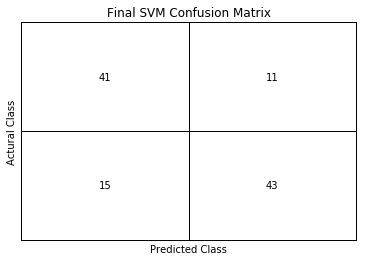

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
kf=KFold(n_splits=10)
score1=0
sumTP=0
sumFN=0
sumFP=0
sumTN=0
Area=0
#print(trainDF)
for train,validation in kf.split(trainDF):
    trainSet=df.iloc[train]
    validationSet=df.iloc[validation]
    x_trainS=trainSet.iloc[:,:-1]
    y_trainS=trainSet.iloc[:,11]
    x_valS=validationSet.iloc[:,:-1]
    y_valS=validationSet.iloc[:,11]
    #logreg = LogisticRegression()
    #l=logreg.fit(x_trainL, y_trainL)
    #y_predL = logreg.predict(x_valL)
    #print('LogReg %s' % logreg.score(x_valL, y_valL))
    scaler = StandardScaler()
    scaler.fit(x_trainS)
    x_trainS=scaler.transform(x_trainS)
    #scaler.fit(x_valS)
    x_valS=scaler.transform(x_valS)
    
    sv = svm.SVC(gamma='scale',probability=True)
    sv.fit(x_trainS, y_trainS)  

    y_predS= sv.predict(x_valS)
    sv.score(x_valS, y_valS)

    from sklearn.metrics import classification_report, confusion_matrix
    confusionMatrixS = confusion_matrix(y_valS,y_predS)
    print(confusionMatrixS)
    print(classification_report(y_valS,y_predS))

    score1 += sv.score(x_valS, y_valS)
    confusionMatrixS = confusion_matrix(y_valS,y_predS)
    print(confusionMatrixS)
    stats(confusionMatrixS) 
    pl.title('SVM Confusion Matrix')
    SVM_roc_auc = roc_auc_score(y_valS, sv.predict_proba(x_valS)[:,1])
    print('Area under ROC',SVM_roc_auc)
    Area +=SVM_roc_auc
    print(classification_report(y_valS,y_predS))
    fpr, tpr, thresholds = roc_curve(y_valS, sv.predict_proba(x_valS)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % SVM_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVM Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('SVM_ROC')
    plt.show()
        
    sumTP+=confusionMatrixS[0,0]
    sumFN+=confusionMatrixS[0,1]
    sumFP+=confusionMatrixS[1,0]
    sumTN+=confusionMatrixS[1,1]
    
print('\nAveraged SVM Accuracy %s' % str(float(score1)/10))
print('Avearged Area under ROC',Area/10)

print('\n')
sumConfusionMatrix=np.array([[sumTP/10,sumFN/10],[sumFP/10,sumTN/10]],np.int32)
stats(sumConfusionMatrix)
pl.title('Final SVM Confusion Matrix')


Number of mislabeled points out of a total 112 points : 43
Decision Tree 0.6160714285714286
[[53 28]
 [15 16]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71        81
           1       0.36      0.52      0.43        31

   micro avg       0.62      0.62      0.62       112
   macro avg       0.57      0.59      0.57       112
weighted avg       0.66      0.62      0.63       112

[[53 28]
 [15 16]]
Accuracy 0.6160714285714286
TPR 0.654320987654321
FPR 0.4838709677419355
Precision 0.7794117647058824
F-measure 0.7114093959731543
Area under ROC 0.5852250099561928
              precision    recall  f1-score   support

           0       0.78      0.65      0.71        81
           1       0.36      0.52      0.43        31

   micro avg       0.62      0.62      0.62       112
   macro avg       0.57      0.59      0.57       112
weighted avg       0.66      0.62      0.63       112



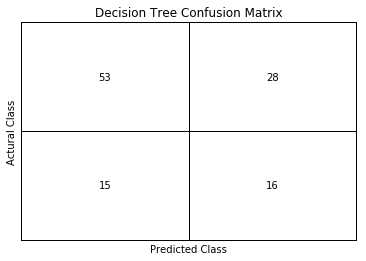

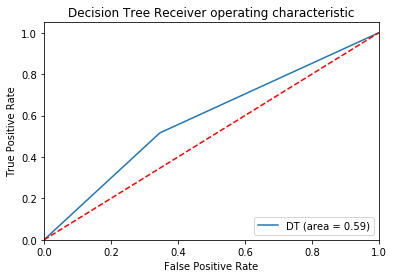

Number of mislabeled points out of a total 112 points : 44
Decision Tree 0.6071428571428571
[[53 22]
 [22 15]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        75
           1       0.41      0.41      0.41        37

   micro avg       0.61      0.61      0.61       112
   macro avg       0.56      0.56      0.56       112
weighted avg       0.61      0.61      0.61       112

[[53 22]
 [22 15]]
Accuracy 0.6071428571428571
TPR 0.7066666666666667
FPR 0.5945945945945946
Precision 0.7066666666666667
F-measure 0.7066666666666667
Area under ROC 0.5560360360360361
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        75
           1       0.41      0.41      0.41        37

   micro avg       0.61      0.61      0.61       112
   macro avg       0.56      0.56      0.56       112
weighted avg       0.61      0.61      0.61       112



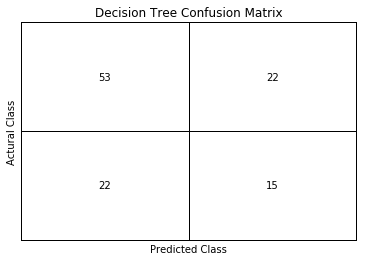

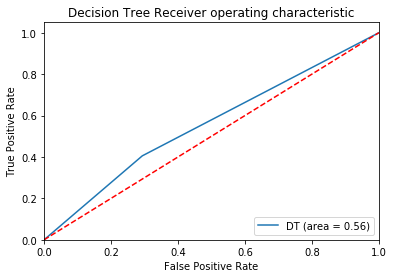

Number of mislabeled points out of a total 112 points : 40
Decision Tree 0.6428571428571429
[[23 21]
 [19 49]]
              precision    recall  f1-score   support

           0       0.55      0.52      0.53        44
           1       0.70      0.72      0.71        68

   micro avg       0.64      0.64      0.64       112
   macro avg       0.62      0.62      0.62       112
weighted avg       0.64      0.64      0.64       112

[[23 21]
 [19 49]]
Accuracy 0.6428571428571429
TPR 0.5227272727272727
FPR 0.27941176470588236
Precision 0.5476190476190477
F-measure 0.5348837209302325
Area under ROC 0.6216577540106952
              precision    recall  f1-score   support

           0       0.55      0.52      0.53        44
           1       0.70      0.72      0.71        68

   micro avg       0.64      0.64      0.64       112
   macro avg       0.62      0.62      0.62       112
weighted avg       0.64      0.64      0.64       112



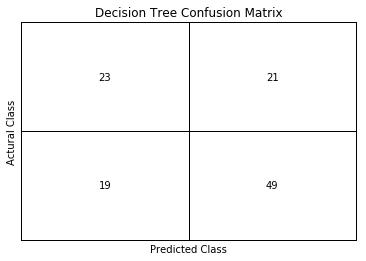

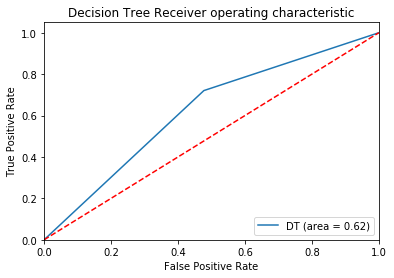

Number of mislabeled points out of a total 112 points : 37
Decision Tree 0.6696428571428571
[[24 12]
 [25 51]]
              precision    recall  f1-score   support

           0       0.49      0.67      0.56        36
           1       0.81      0.67      0.73        76

   micro avg       0.67      0.67      0.67       112
   macro avg       0.65      0.67      0.65       112
weighted avg       0.71      0.67      0.68       112

[[24 12]
 [25 51]]
Accuracy 0.6696428571428571
TPR 0.6666666666666666
FPR 0.32894736842105265
Precision 0.4897959183673469
F-measure 0.5647058823529412
Area under ROC 0.668859649122807
              precision    recall  f1-score   support

           0       0.49      0.67      0.56        36
           1       0.81      0.67      0.73        76

   micro avg       0.67      0.67      0.67       112
   macro avg       0.65      0.67      0.65       112
weighted avg       0.71      0.67      0.68       112



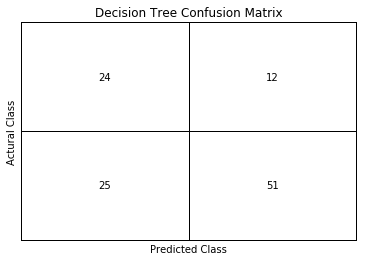

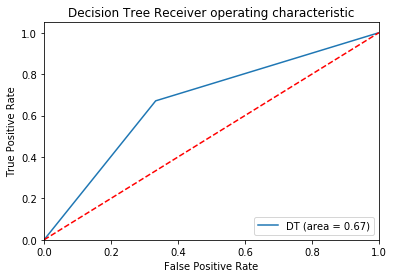

Number of mislabeled points out of a total 112 points : 41
Decision Tree 0.6339285714285714
[[12 30]
 [11 59]]
              precision    recall  f1-score   support

           0       0.52      0.29      0.37        42
           1       0.66      0.84      0.74        70

   micro avg       0.63      0.63      0.63       112
   macro avg       0.59      0.56      0.56       112
weighted avg       0.61      0.63      0.60       112

[[12 30]
 [11 59]]
Accuracy 0.6339285714285714
TPR 0.2857142857142857
FPR 0.15714285714285714
Precision 0.5217391304347826
F-measure 0.36923076923076925
Area under ROC 0.5642857142857143
              precision    recall  f1-score   support

           0       0.52      0.29      0.37        42
           1       0.66      0.84      0.74        70

   micro avg       0.63      0.63      0.63       112
   macro avg       0.59      0.56      0.56       112
weighted avg       0.61      0.63      0.60       112



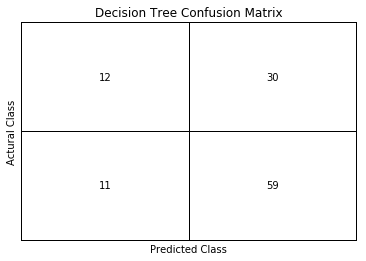

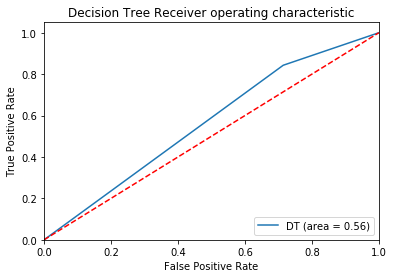

Number of mislabeled points out of a total 112 points : 46
Decision Tree 0.5892857142857143
[[39 22]
 [24 27]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        61
           1       0.55      0.53      0.54        51

   micro avg       0.59      0.59      0.59       112
   macro avg       0.59      0.58      0.58       112
weighted avg       0.59      0.59      0.59       112

[[39 22]
 [24 27]]
Accuracy 0.5892857142857143
TPR 0.639344262295082
FPR 0.47058823529411764
Precision 0.6190476190476191
F-measure 0.6290322580645161
Area under ROC 0.5843780135004821
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        61
           1       0.55      0.53      0.54        51

   micro avg       0.59      0.59      0.59       112
   macro avg       0.59      0.58      0.58       112
weighted avg       0.59      0.59      0.59       112



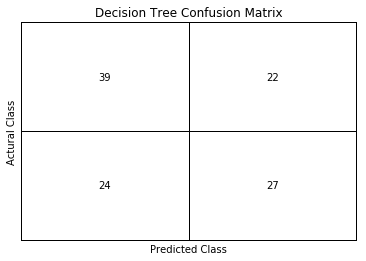

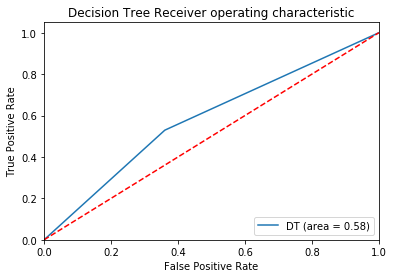

Number of mislabeled points out of a total 112 points : 45
Decision Tree 0.5982142857142857
[[55 23]
 [22 12]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        78
           1       0.34      0.35      0.35        34

   micro avg       0.60      0.60      0.60       112
   macro avg       0.53      0.53      0.53       112
weighted avg       0.60      0.60      0.60       112

[[55 23]
 [22 12]]
Accuracy 0.5982142857142857
TPR 0.7051282051282052
FPR 0.6470588235294118
Precision 0.7142857142857143
F-measure 0.7096774193548387
Area under ROC 0.5290346907993967
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        78
           1       0.34      0.35      0.35        34

   micro avg       0.60      0.60      0.60       112
   macro avg       0.53      0.53      0.53       112
weighted avg       0.60      0.60      0.60       112



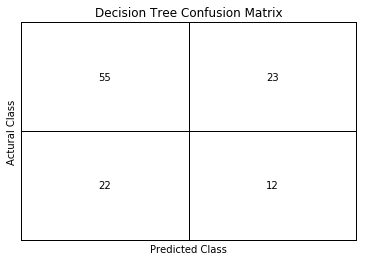

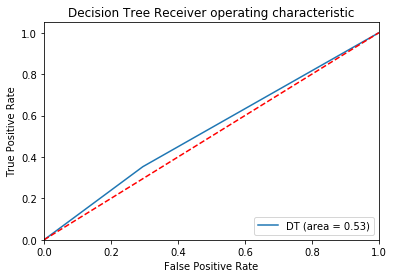

Number of mislabeled points out of a total 112 points : 37
Decision Tree 0.6696428571428571
[[30 24]
 [13 45]]
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        54
           1       0.65      0.78      0.71        58

   micro avg       0.67      0.67      0.67       112
   macro avg       0.67      0.67      0.66       112
weighted avg       0.67      0.67      0.67       112

[[30 24]
 [13 45]]
Accuracy 0.6696428571428571
TPR 0.5555555555555556
FPR 0.22413793103448276
Precision 0.6976744186046512
F-measure 0.6185567010309279
Area under ROC 0.6657088122605365
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        54
           1       0.65      0.78      0.71        58

   micro avg       0.67      0.67      0.67       112
   macro avg       0.67      0.67      0.66       112
weighted avg       0.67      0.67      0.67       112



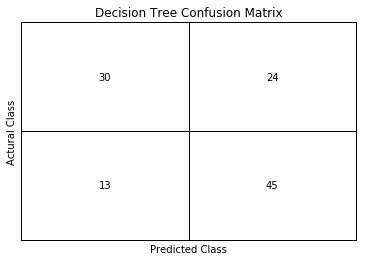

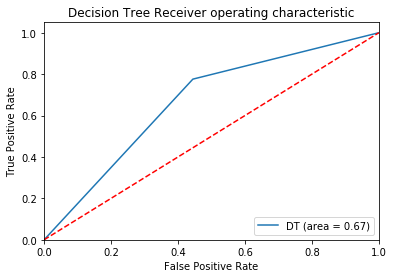

Number of mislabeled points out of a total 112 points : 36
Decision Tree 0.6785714285714286
[[14 21]
 [15 62]]
              precision    recall  f1-score   support

           0       0.48      0.40      0.44        35
           1       0.75      0.81      0.77        77

   micro avg       0.68      0.68      0.68       112
   macro avg       0.61      0.60      0.61       112
weighted avg       0.66      0.68      0.67       112

[[14 21]
 [15 62]]
Accuracy 0.6785714285714286
TPR 0.4
FPR 0.19480519480519481
Precision 0.4827586206896552
F-measure 0.4375
Area under ROC 0.6025974025974026
              precision    recall  f1-score   support

           0       0.48      0.40      0.44        35
           1       0.75      0.81      0.77        77

   micro avg       0.68      0.68      0.68       112
   macro avg       0.61      0.60      0.61       112
weighted avg       0.66      0.68      0.67       112



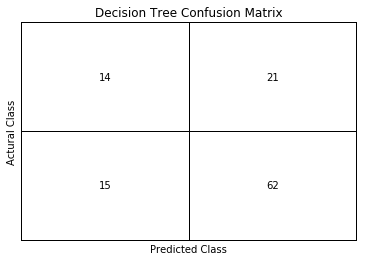

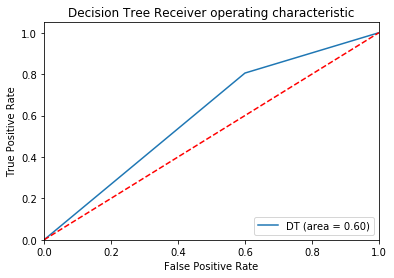

Number of mislabeled points out of a total 111 points : 35
Decision Tree 0.6846846846846847
[[10 14]
 [21 66]]
              precision    recall  f1-score   support

           0       0.32      0.42      0.36        24
           1       0.82      0.76      0.79        87

   micro avg       0.68      0.68      0.68       111
   macro avg       0.57      0.59      0.58       111
weighted avg       0.72      0.68      0.70       111

[[10 14]
 [21 66]]
Accuracy 0.6846846846846847
TPR 0.4166666666666667
FPR 0.2413793103448276
Precision 0.3225806451612903
F-measure 0.36363636363636365
Area under ROC 0.5876436781609196
              precision    recall  f1-score   support

           0       0.32      0.42      0.36        24
           1       0.82      0.76      0.79        87

   micro avg       0.68      0.68      0.68       111
   macro avg       0.57      0.59      0.58       111
weighted avg       0.72      0.68      0.70       111



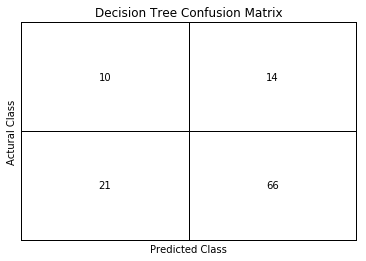

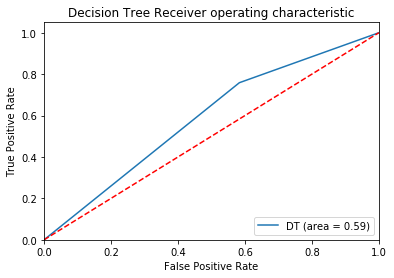


Averaged dt Accuracy 0.6390041827541827
Avearged Area under ROC 0.5965426760730183


Accuracy 0.6454545454545455
TPR 0.5961538461538461
FPR 0.3103448275862069
Precision 0.6326530612244898
F-measure 0.6138613861386139


Text(0.5, 1.0, 'Final Decision Tree Confusion Matrix')

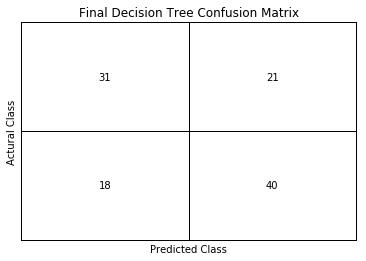

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
kf=KFold(n_splits=10)
score1=0
sumTP=0
sumFN=0
sumFP=0
sumTN=0
Area=0
#print(trainDF)
for train,validation in kf.split(trainDF):
    trainSet=df.iloc[train]
    validationSet=df.iloc[validation]
    x_trainT=trainSet.iloc[:,:-1]
    y_trainT=trainSet.iloc[:,11]
    x_valT=validationSet.iloc[:,:-1]
    y_valT=validationSet.iloc[:,11]
    #logreg = LogisticRegression()
    #l=logreg.fit(x_trainL, y_trainL)
    #y_predL = logreg.predict(x_valL)
    #print('LogReg %s' % logreg.score(x_valL, y_valL))
    DT = tree.DecisionTreeClassifier()
    DT.fit(x_trainT, y_trainT)

    y_predT=DT.predict(x_valT)
    print("Number of mislabeled points out of a total %d points : %d"
      % (y_valT.shape[0],(y_valT != y_predT).sum()))

    print('Decision Tree %s' % DT.score(x_valT, y_valT))

    from sklearn.metrics import classification_report, confusion_matrix
    confusionMatrixT = confusion_matrix(y_valT,y_predT)
    print(confusionMatrixT)
    print(classification_report(y_valT,y_predT))

    score1 += DT.score(x_valT, y_valT)
    confusionMatrixT = confusion_matrix(y_valT,y_predT)
    print(confusionMatrixT)
    stats(confusionMatrixT) 
    pl.title('Decision Tree Confusion Matrix')
    DT_roc_auc = roc_auc_score(y_valT, DT.predict_proba(x_valT)[:,1])
    print('Area under ROC',DT_roc_auc)
    Area +=DT_roc_auc
    print(classification_report(y_valT,y_predT))
    fpr, tpr, thresholds = roc_curve(y_valT, DT.predict_proba(x_valT)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='DT (area = %0.2f)' % DT_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('DT_ROC')
    plt.show()
        
    sumTP+=confusionMatrixT[0,0]
    sumFN+=confusionMatrixT[0,1]
    sumFP+=confusionMatrixT[1,0]
    sumTN+=confusionMatrixT[1,1]
    
print('\nAveraged dt Accuracy %s' % str(float(score1)/10))
print('Avearged Area under ROC',Area/10)

print('\n')
sumConfusionMatrix=np.array([[sumTP/10,sumFN/10],[sumFP/10,sumTN/10]],np.int32)
stats(sumConfusionMatrix)
pl.title('Final Decision Tree Confusion Matrix')

[[185  52]
 [ 50 193]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       237
           1       0.79      0.79      0.79       243

   micro avg       0.79      0.79      0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480

[[185  52]
 [ 50 193]]
Accuracy 0.7875
TPR 0.7805907172995781
FPR 0.205761316872428
Precision 0.7872340425531915
F-measure 0.7838983050847458
Area under ROC 0.8728099876716848
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       237
           1       0.79      0.79      0.79       243

   micro avg       0.79      0.79      0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



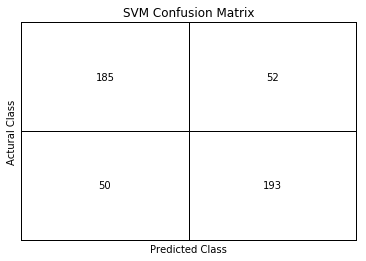

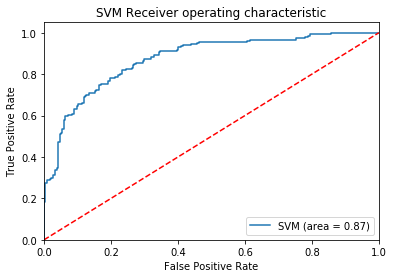

[[190  47]
 [ 44 199]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       237
           1       0.81      0.82      0.81       243

   micro avg       0.81      0.81      0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480

[[190  47]
 [ 44 199]]
Accuracy 0.8104166666666667
TPR 0.8016877637130801
FPR 0.18106995884773663
Precision 0.811965811965812
F-measure 0.8067940552016986
Area under ROC 0.8765345279644388
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       237
           1       0.81      0.82      0.81       243

   micro avg       0.81      0.81      0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



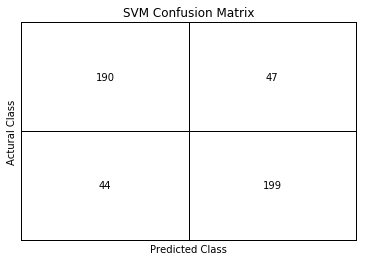

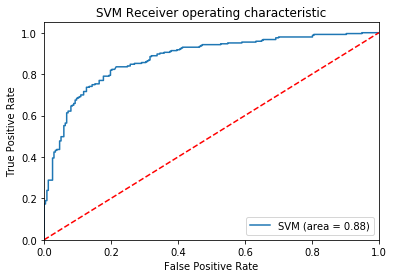

[[189  48]
 [ 56 187]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       237
           1       0.80      0.77      0.78       243

   micro avg       0.78      0.78      0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480

[[189  48]
 [ 56 187]]
Accuracy 0.7833333333333333
TPR 0.7974683544303798
FPR 0.23045267489711935
Precision 0.7714285714285715
F-measure 0.7842323651452282
Area under ROC 0.8703443246340574
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       237
           1       0.80      0.77      0.78       243

   micro avg       0.78      0.78      0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480



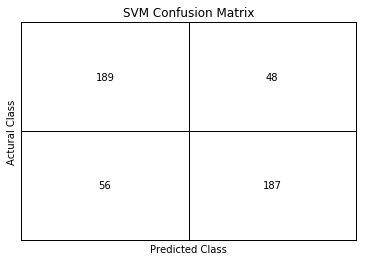

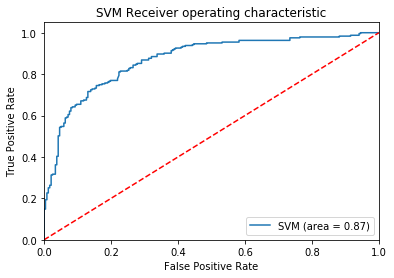

[[194  43]
 [ 59 184]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       237
           1       0.81      0.76      0.78       243

   micro avg       0.79      0.79      0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480

[[194  43]
 [ 59 184]]
Accuracy 0.7875
TPR 0.8185654008438819
FPR 0.24279835390946503
Precision 0.766798418972332
F-measure 0.7918367346938775
Area under ROC 0.8756316091055893
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       237
           1       0.81      0.76      0.78       243

   micro avg       0.79      0.79      0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



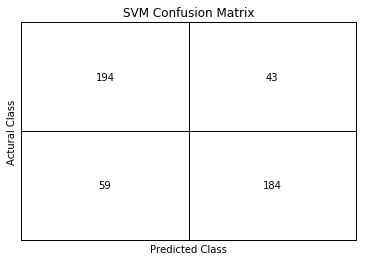

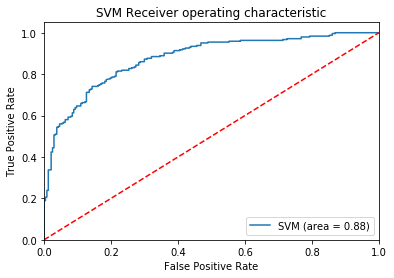

[[193  44]
 [ 59 184]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       237
           1       0.81      0.76      0.78       243

   micro avg       0.79      0.79      0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480

[[193  44]
 [ 59 184]]
Accuracy 0.7854166666666667
TPR 0.8143459915611815
FPR 0.24279835390946503
Precision 0.7658730158730159
F-measure 0.7893660531697342
Area under ROC 0.8745637339167578
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       237
           1       0.81      0.76      0.78       243

   micro avg       0.79      0.79      0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



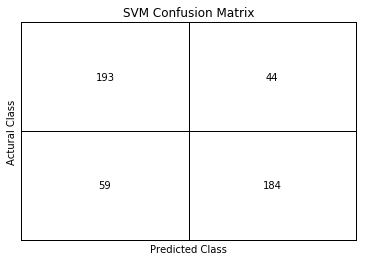

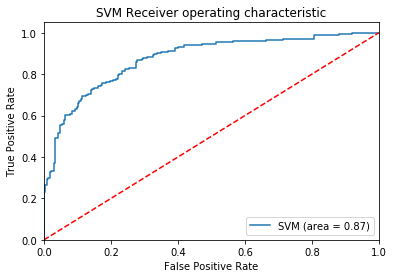

[[190  47]
 [ 55 188]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       237
           1       0.80      0.77      0.79       243

   micro avg       0.79      0.79      0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480

[[190  47]
 [ 55 188]]
Accuracy 0.7875
TPR 0.8016877637130801
FPR 0.22633744855967078
Precision 0.7755102040816326
F-measure 0.7883817427385892
Area under ROC 0.8716726571860186
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       237
           1       0.80      0.77      0.79       243

   micro avg       0.79      0.79      0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



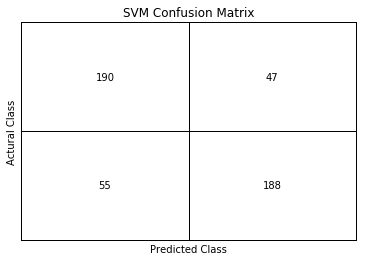

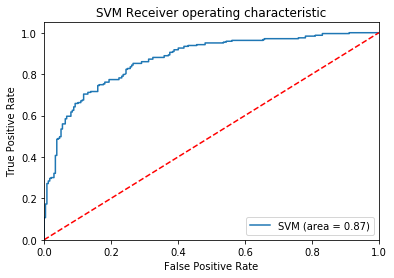

[[179  58]
 [ 41 202]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       237
           1       0.78      0.83      0.80       243

   micro avg       0.79      0.79      0.79       480
   macro avg       0.80      0.79      0.79       480
weighted avg       0.80      0.79      0.79       480

[[179  58]
 [ 41 202]]
Accuracy 0.79375
TPR 0.7552742616033755
FPR 0.16872427983539096
Precision 0.8136363636363636
F-measure 0.7833698030634574
Area under ROC 0.8715945199770797
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       237
           1       0.78      0.83      0.80       243

   micro avg       0.79      0.79      0.79       480
   macro avg       0.80      0.79      0.79       480
weighted avg       0.80      0.79      0.79       480



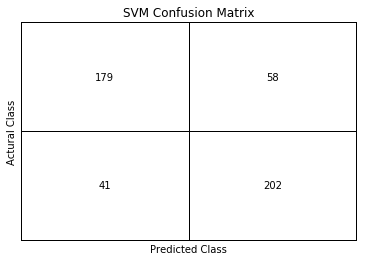

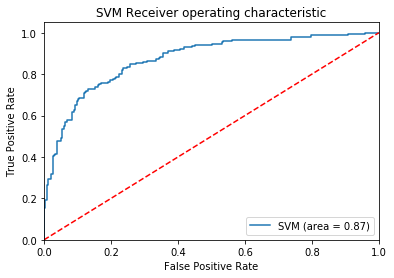

[[188  49]
 [ 54 189]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       237
           1       0.79      0.78      0.79       243

   micro avg       0.79      0.79      0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480

[[188  49]
 [ 54 189]]
Accuracy 0.7854166666666667
TPR 0.7932489451476793
FPR 0.2222222222222222
Precision 0.7768595041322314
F-measure 0.7849686847599165
Area under ROC 0.8705179628761439
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       237
           1       0.79      0.78      0.79       243

   micro avg       0.79      0.79      0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



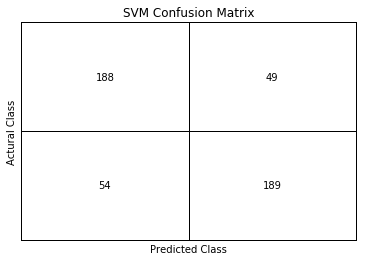

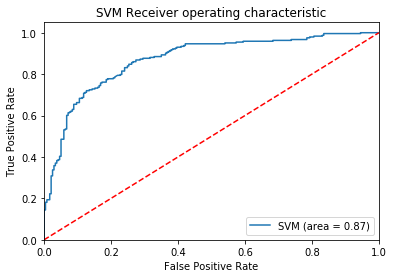

[[195  42]
 [ 52 191]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       237
           1       0.82      0.79      0.80       243

   micro avg       0.80      0.80      0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480

[[195  42]
 [ 52 191]]
Accuracy 0.8041666666666667
TPR 0.8227848101265823
FPR 0.2139917695473251
Precision 0.7894736842105263
F-measure 0.8057851239669421
Area under ROC 0.8789741452657533
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       237
           1       0.82      0.79      0.80       243

   micro avg       0.80      0.80      0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



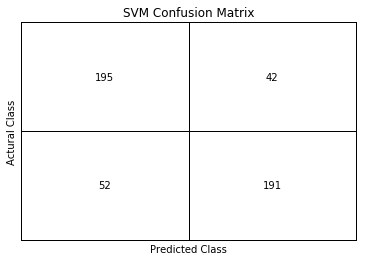

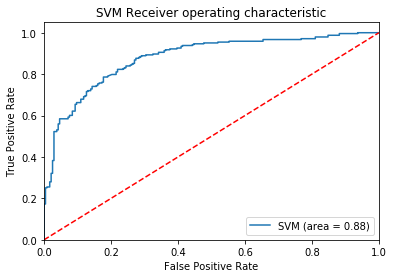

[[193  44]
 [ 60 183]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       237
           1       0.81      0.75      0.78       243

   micro avg       0.78      0.78      0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480

[[193  44]
 [ 60 183]]
Accuracy 0.7833333333333333
TPR 0.8143459915611815
FPR 0.24691358024691357
Precision 0.7628458498023716
F-measure 0.7877551020408163
Area under ROC 0.8753451060061468
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       237
           1       0.81      0.75      0.78       243

   micro avg       0.78      0.78      0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480



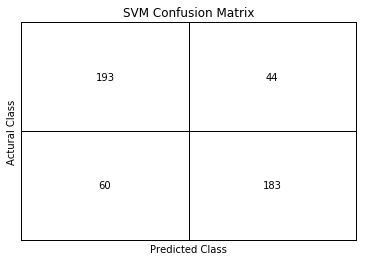

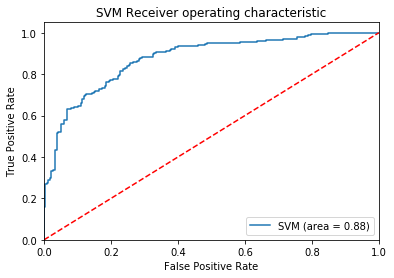


Averaged SVM Accuracy 0.7908333333333333
Avearged Area under ROC 0.8737988574603671


Accuracy 0.791231732776618
TPR 0.8008474576271186
FPR 0.21810699588477367
Precision 0.78099173553719
F-measure 0.7907949790794979


Text(0.5, 1.0, 'Final SVM Confusion Matrix')

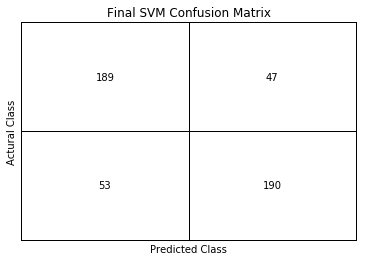

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
kf=KFold(n_splits=10)
score1=0
sumTP=0
sumFN=0
sumFP=0
sumTN=0
Area=0
#print(trainDF)
for train,validation in kf.split(trainDF):
    trainSet=df.iloc[train]
    #validationSet=df.iloc[validation]
    x_trainS=trainSet.iloc[:,:-1]
    y_trainS=trainSet.iloc[:,11]
    #x_valS=x_test.iloc[:,:-1]
    #y_valS=y_test.iloc[:,11]
    #logreg = LogisticRegression()
    #l=logreg.fit(x_trainL, y_trainL)
    #y_predL = logreg.predict(x_valL)
    #print('LogReg %s' % logreg.score(x_valL, y_valL))
    scaler = StandardScaler()
    scaler.fit(x_trainS)
    x_trainS=scaler.transform(x_trainS)
    scaler.fit(x_test)
    x_testS=scaler.transform(x_test)
    
    sv = svm.SVC(gamma='scale',probability=True)
    sv.fit(x_trainS, y_trainS)  

    y_predS= sv.predict(x_testS)
    sv.score(x_testS, y_test)

    from sklearn.metrics import classification_report, confusion_matrix
    confusionMatrixS = confusion_matrix(y_test,y_predS)
    print(confusionMatrixS)
    print(classification_report(y_test,y_predS))

    score1 += sv.score(x_testS, y_test)
    confusionMatrixS = confusion_matrix(y_test,y_predS)
    print(confusionMatrixS)
    stats(confusionMatrixS) 
    pl.title('SVM Confusion Matrix')
    SVM_roc_auc = roc_auc_score(y_test, sv.predict_proba(x_testS)[:,1])
    print('Area under ROC',SVM_roc_auc)
    Area +=SVM_roc_auc
    print(classification_report(y_test,y_predS))
    fpr, tpr, thresholds = roc_curve(y_test, sv.predict_proba(x_testS)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % SVM_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVM Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('SVM_ROC')
    plt.show()
        
    sumTP+=confusionMatrixS[0,0]
    sumFN+=confusionMatrixS[0,1]
    sumFP+=confusionMatrixS[1,0]
    sumTN+=confusionMatrixS[1,1]
    
print('\nAveraged SVM Accuracy %s' % str(float(score1)/10))
print('Avearged Area under ROC',Area/10)

print('\n')
sumConfusionMatrix=np.array([[sumTP/10,sumFN/10],[sumFP/10,sumTN/10]],np.int32)
stats(sumConfusionMatrix)
pl.title('Final SVM Confusion Matrix')
